<a href="https://colab.research.google.com/github/T-Naveen-2308/IITM-MLT-Assignments/blob/main/W1_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset

We will be working with a subset of the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [ ]:
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train[y_train == 2][: 100].reshape(-1, 28 * 28)
test_image = X_test[y_test == 2][0].reshape(28 * 28)

## Problem-1

How many samples does the dataset have?

In [ ]:
# Enter your solution here
print(X.shape[0])

100


## Problem-2

How many features does the dataset have?

In [ ]:
# Enter your solution here
print(X.shape[1])

784


## Problem-3

Each sample corresponds to an image of dimension $28 \times 28$. Visualize one of these images using the `matplotlib` library.

- You need to know how to reshape a feature vector. Refer to week-0 content for the same.
- You can refer to the following [document](https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py) for plotting NumPy arrays as images using `matplotlib`.

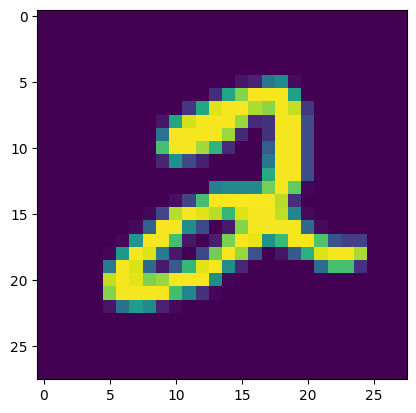

In [ ]:
# Enter your solution here
import matplotlib.pyplot as plt

plt.imshow(X[0].reshape(28, 28))

## Problem-4

Center the the dataset $\mathbf{X}$ around its mean. Call this centered dataset $\mathbf{X}^{\prime}$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n \cdot d} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{d} (X_{ij}^{\prime})^2}
$$

In [ ]:
# Enter your solution here

X1 = X - X.mean(axis=0, keepdims=True)

sumi = 0
for row in X1:
  for val in row:
    sumi += val*val

from math import sqrt

print(sqrt(sumi)/(100*784))

0.23242174456564954


## Problem-5

Compute the covariance matrix $\mathbf{C}$ of the centered dataset.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{d^2} \sqrt{\sum \limits_{i = 1}^{d} \sum \limits_{j = 1}^{d} C_{ij}^2}
$$

In [ ]:
# Enter your solution here

C = 1/100 * (X1 @ X1.T)

sumi = 0
for row in C:
  for val in row:
    sumi += val*val

from math import sqrt

print(sqrt(sumi)/(784*784))

1.364806100923225


## Problem-6

Compute the first and second principal components of the dataset, $\mathbf{w}_1$ and $\mathbf{w}_2$.

<u>Conversion</u>

Compute:
$$
\mathbf{w} = \mathbf{w}_1 + \mathbf{w}_2
$$

Enter the following quantity as your answer correct to two decimal places:

$$
\left| \sum \limits_{i = 1}^{d} w_i \right|
$$

In [ ]:
# Enter your solution here

eigenvalues, eigenvectors = np.linalg.eig(C)

w = eigenvectors[0]+eigenvectors[1]

sumi = 0
for i in w:
  sumi += i
print(abs(sumi))

[6.24013678e+05 2.85944623e+05 2.37580596e+05 2.10088069e+05
 1.67865492e+05 1.41821282e+05 1.34313485e+05 9.62536000e+04
 9.44557612e+04 8.10246647e+04 7.50442488e+04 6.72112886e+04
 5.91732310e+04 5.65652380e+04 5.19588316e+04 4.75497624e+04
 4.56765117e+04 4.21282119e+04 3.96933876e+04 3.69378230e+04
 3.54552619e+04 3.23419908e+04 2.96709675e+04 2.98982062e+04
 2.72737971e+04 2.61423208e+04 2.54312091e+04 2.38093683e+04
 2.21228850e+04 2.10708881e+04 1.93831895e+04 1.88052470e+04
 1.83322931e+04 1.73007062e+04 1.62283876e+04 1.53230686e+04
 1.48753435e+04 1.42766028e+04 1.34538456e+04 1.30333819e+04
 1.23769062e+04 1.20899698e+04 1.17650389e+04 1.10608755e+04
 1.03651870e+04 1.01451186e+04 9.35406400e+03 3.79782977e-11
 9.11256871e+03 8.84279295e+03 8.62352637e+03 8.32117649e+03
 7.93326203e+03 7.51345967e+03 7.37233474e+03 7.19514340e+03
 6.91561839e+03 6.76930947e+03 6.20878071e+03 6.01684783e+03
 5.77218455e+03 5.74705091e+03 5.49691926e+03 5.29815443e+03
 1.06998611e+03 5.031278

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()

# Fit PCA to the data (it will automatically center the data)
pca.fit(X)

# Get the principal components
eigenvectors = pca.components_

# Get the explained variance (eigenvalues)
eigenvalues = pca.explained_variance_

# Print the eigenvalues (variance explained by each component)
print("Eigenvalues:", eigenvalues)

# Print the eigenvectors (principal components)
print("Eigenvectors (Principal Components):", eigenvectors)

Eigenvalues: [6.30316846e+05 2.88832953e+05 2.39980400e+05 2.12210170e+05
 1.69561104e+05 1.43253820e+05 1.35670187e+05 9.72258586e+04
 9.54098598e+04 8.18430957e+04 7.58022715e+04 6.78901905e+04
 5.97709404e+04 5.71366040e+04 5.24836683e+04 4.80300630e+04
 4.61378906e+04 4.25537494e+04 4.00943309e+04 3.73109324e+04
 3.58133959e+04 3.26686775e+04 3.02002082e+04 2.99706742e+04
 2.75492900e+04 2.64063846e+04 2.56880900e+04 2.40498670e+04
 2.23463485e+04 2.12837253e+04 1.95789793e+04 1.89951990e+04
 1.85174677e+04 1.74754608e+04 1.63923107e+04 1.54778471e+04
 1.50255995e+04 1.44208109e+04 1.35897430e+04 1.31650322e+04
 1.25019254e+04 1.22120907e+04 1.18838777e+04 1.11726016e+04
 1.04698859e+04 1.02475946e+04 9.44854950e+03 9.20461486e+03
 8.93211409e+03 8.71063270e+03 8.40522878e+03 8.01339599e+03
 7.58935321e+03 7.44680277e+03 7.26782162e+03 6.98547312e+03
 6.83768633e+03 6.27149567e+03 6.07762407e+03 5.83048945e+03
 5.80510193e+03 5.55244370e+03 5.35167114e+03 5.08209978e+03
 4.88363649

## Problem-7

Visualize the first principal component as an image.

In [ ]:
# Enter your solution here



## Problem-8

Find the smallest value of $k$ for which the first $k$ principal components capture at least $95\%$ of the variance in the data.

In [ ]:
# Enter your solution here



## Problem-9

Given a `test_image`, visualize the proxies  by reconstructing it using the top $k$ principal components. Consider four values of $k$; values of $k$ for which the top-$k$ principal components explain:

- 20% of the variance
- 50% of the variance
- 80% of the variance
- 95% of the variance



In [ ]:
# Enter your solution here